In [1]:
import app.importer as importer
from app.data import get_data_csv

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

import io

sns.set_style('darkgrid')
pd.set_option('display.max_rows', 100)

# Import data to our local sqlite database

In [2]:
# This only needs to be done once
# importer.import_data()

In [3]:
# Run if you want to clean up, importing data is blocked if its already been imported
# importer.delete_data()

# Load our dataframe

In [3]:
output = io.StringIO()
museums_data = get_data_csv()
output.write(museums_data)
output.seek(0)
museums_df = pd.read_csv(output)
museums_df.set_index('museum_name', inplace=True)

# Add a calculated column that'll be convenient later
museums_df['visitors_per_population'] = museums_df.apply(lambda row: row.visitors_per_year / row.population, axis=1)

In [4]:
museums_df

,visitors_per_year,city_name,population,visitors_per_population
museum_name,,,,
Louvre,10200000,Paris,2148271,4.748004
National Museum of China,8610092,Beijing,21542000,0.399689
Metropolitan Museum of Art[a],6953927,New York City,8175133,0.850619
Vatican Museums,6756186,Vatican City,825,8189.316364
National Air and Space Museum,6200000,"Washington, D.C.",702455,8.826188
Tate Modern,5868562,London,8908081,0.658791
British Museum,5829000,London,8908081,0.654350
National Gallery,5735831,London,8908081,0.643891
Natural History Museum,5226000,London,8908081,0.586658


# Do some data exploration!

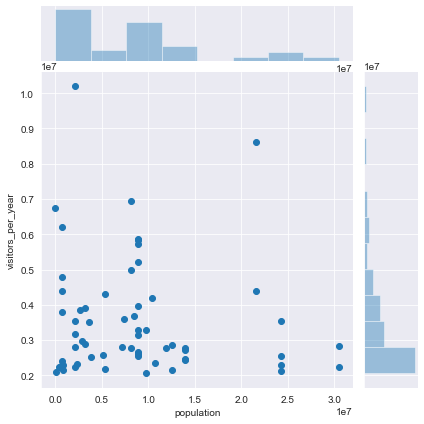

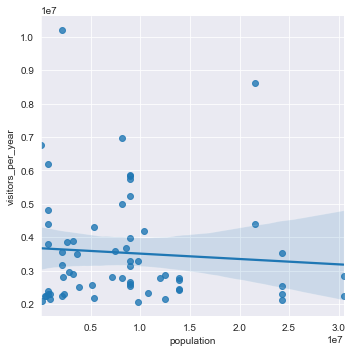

In [6]:
sns.jointplot(data=museums_df,x='population', y='visitors_per_year')
sns.lmplot(data=museums_df, x='population', y='visitors_per_year')

### How strange! It appears that museum vits are inversely correlated with population! Barely, it's almost uncorrelated, but still, the negative trend is unexpected! This warrants further exploration

In [7]:
x_axis = museums_df['population']
y_axis = museums_df['visitors_per_year']
linear_reg = LinearRegression()
linear_reg.fit(x_axis.values.reshape(-1, 1), y_axis.values.reshape(-1, 1))
linear_reg.coef_[0][0]

-0.016039979593582884

### Let's find some outliers in the visitors / population ratio

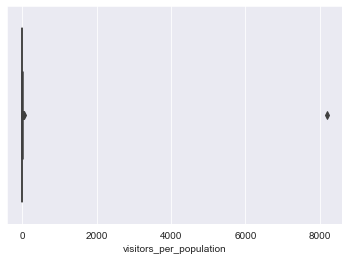

In [8]:
sns.boxplot(museums_df['visitors_per_population'])

### Yikes! What's going on here? There's a tiny town with a super popular museum! 
oh. its the Vatican. That's cheating. We should probably use Rome's population

In [9]:
museums_df_fixed_vatican = museums_df.copy()
museums_df_fixed_vatican.at['Vatican Museums', 'population'] = 2860009
museums_df_fixed_vatican.at['Vatican Museums', 'visitors_per_population'] = museums_df_fixed_vatican.at['Vatican Museums', 'visitors_per_year'] / museums_df_fixed_vatican.at['Vatican Museums', 'population']

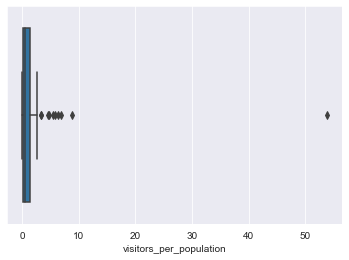

In [10]:
sns.boxplot(museums_df_fixed_vatican['visitors_per_population'])

### We still have one major outlier, Auschwitz, a museum that's not located within a major city, for obvious reasons. Let's redo our linear regression.

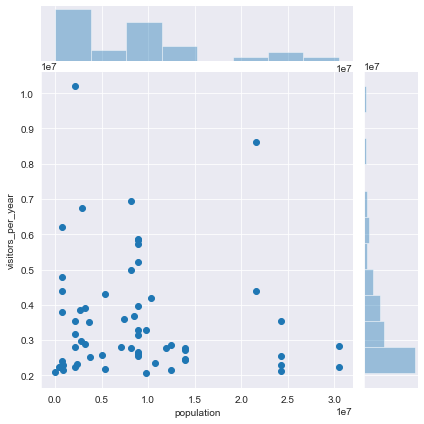

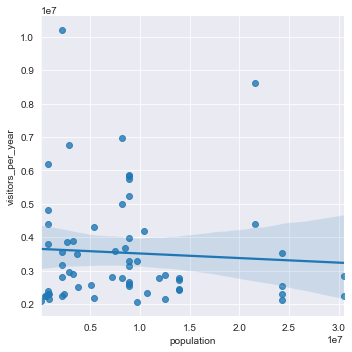

In [11]:
sns.jointplot(data=museums_df_fixed_vatican,x='population', y='visitors_per_year')
sns.lmplot(data=museums_df_fixed_vatican, x='population', y='visitors_per_year')

In [12]:
x_axis_without_vatican = museums_df_fixed_vatican['population']
y_axis_without_vatican = museums_df_fixed_vatican['visitors_per_year']
linear_reg_without_vatican = LinearRegression()
linear_reg_without_vatican.fit(x_axis_without_vatican.values.reshape(-1, 1), y_axis_without_vatican.values.reshape(-1, 1))
linear_reg_without_vatican.coef_[0][0]

-0.013682879104670696

### The ratio is a little less negative, but it still shows a negligeable level of correlation
### Out of curiosity, lets see how it is without Auschwitz

In [13]:
museums_df_without_auschwitz = museums_df_fixed_vatican.copy()
museums_df_without_auschwitz.drop('Auschwitz-Birkenau State Museum', inplace=True)

x_axis_without_auschwitz = museums_df_without_auschwitz['population']
y_axis_without_auschwitz = museums_df_without_auschwitz['visitors_per_year']
linear_reg_without_auschwitz = LinearRegression()
linear_reg_without_auschwitz.fit(x_axis_without_auschwitz.values.reshape(-1, 1), y_axis_without_auschwitz.values.reshape(-1, 1))
linear_reg_without_auschwitz.coef_[0][0]
museums_df_without_auschwitz

,visitors_per_year,city_name,population,visitors_per_population
museum_name,,,,
Louvre,10200000,Paris,2148271,4.748004
National Museum of China,8610092,Beijing,21542000,0.399689
Metropolitan Museum of Art[a],6953927,New York City,8175133,0.850619
Vatican Museums,6756186,Vatican City,2860009,2.362295
National Air and Space Museum,6200000,"Washington, D.C.",702455,8.826188
Tate Modern,5868562,London,8908081,0.658791
British Museum,5829000,London,8908081,0.654350
National Gallery,5735831,London,8908081,0.643891
Natural History Museum,5226000,London,8908081,0.586658


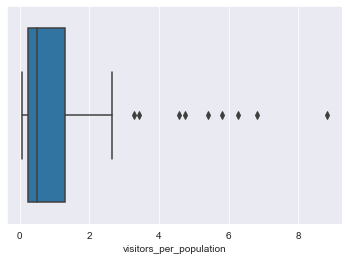

In [14]:
sns.boxplot(museums_df_without_auschwitz['visitors_per_population'])

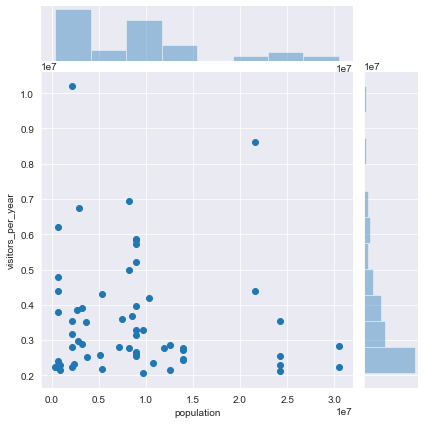

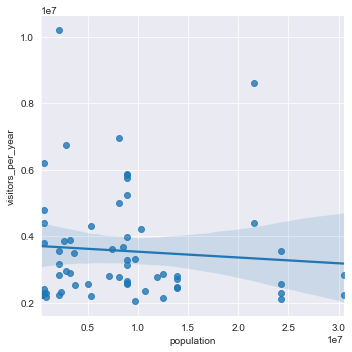

In [15]:
sns.jointplot(data=museums_df_without_auschwitz,x='population', y='visitors_per_year')
sns.lmplot(data=museums_df_without_auschwitz, x='population', y='visitors_per_year')

# The visitors / population ratio
Looking at our dataset, the visitors / population ratio varies a lot. Can we spot some patterns?


In [16]:
museums_df.sort_values(by=['visitors_per_population'])

,visitors_per_year,city_name,population,visitors_per_population
museum_name,,,,
Three Gorges Museum,2240000,Chongqing,30484300,0.073480
Shanghai Museum,2111730,Shanghai,24281400,0.086969
Chongqing Museum of Natural History,2830000,Chongqing,30484300,0.092835
China Art Museum,2300000,Shanghai,24281400,0.094723
China Art Museum,2550000,Shanghai,24281400,0.105019
Shanghai Science and Technology Museum,3540000,Shanghai,24281400,0.145791
Tretyakov Gallery,2148538,Moscow,12506468,0.171794
Tokyo National Museum,2431073,Tokyo,13929280,0.174530
National Museum of Nature and Science,2460000,Tokyo,13929280,0.176606


### The cities with the lowest visitor to population ratio seem to be asian megacities, where the level of tourism compared to the local population size is probably much lower than western cities

# Analysis

In conclusion, for the reasons we discovered above, it would appear that museums visits and city populations are completely unrelated.

A more meaningful study would be correlating museum visits to out-of-town tourists, rather than local population. While there is certainly some correlation between local and tourist populations, due to large cities drawing in more tourists, it would probably still provide a much better correlation by cleaning up the large-but-rarely-visited cities.

But there is clearly more than just population or number of tourists that affects museum visits. We only have to look at cities with multiple museums. Paris, for instance, has 4 museums, with the most popular drawing 10.2M visits while the 4th only has 2.23M visits. And that's only considering the museums with over 2M visits. Clearly something else affects which museums get visited.

It could also be interesting to see how museum visits scale with the number of museums within the same city. Do more museums create a critical mass that turns a city into a "museum capital", drawing in larger crowds than if there was just one main museum? Or on the contrary, do they cannibalize each other's visits because people are in town for other reasons and just want to check a single museum to fill the bucket list?